In [13]:
from functools import reduce
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import *
n_folds=5

# Load results of original experiment

SensdataST = pd.read_pickle('/content/drive/My Drive/CSCW_H1/results/ST_0_5_bert-base-cased_32_0.3_cuda_3_10_5e-05_deduplicated')
SensdataOE = pd.read_pickle('/content/drive/My Drive/CSCW_H1/results/OE_0_5_bert-base-cased_32_0.3_cuda_3_10_5e-05_deduplicated-extra')

In [14]:
test_pred_proba_allST = reduce(lambda x,y: x+y, [SensdataST['test_outs'][i]['pred_proba'] for i in range(n_folds)])
test_pred_y_allST = reduce(lambda x,y: x+y, [SensdataST['test_outs'][i]['pred_y'] for i in range(n_folds)])
test_y_allST = reduce(lambda x,y: x+y, [SensdataST['test_outs'][i]['y'] for i in range(n_folds)])
print(classification_report(test_y_allST, test_pred_y_allST))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        63
           1       0.92      0.79      0.85        82
           2       0.94      0.99      0.96       285

    accuracy                           0.93       430
   macro avg       0.93      0.88      0.90       430
weighted avg       0.93      0.93      0.93       430



In [15]:
test_pred_proba_allOE = reduce(lambda x,y: x+y, [SensdataOE['test_outs'][i]['pred_proba'] for i in range(n_folds)])
test_pred_y_allOE = reduce(lambda x,y: x+y, [SensdataOE['test_outs'][i]['pred_y'] for i in range(n_folds)])
test_y_allOE = reduce(lambda x,y: x+y, [SensdataOE['test_outs'][i]['y'] for i in range(n_folds)])
print(classification_report(test_y_allOE, test_pred_y_allOE))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       187
           1       0.91      0.98      0.94       668
           2       0.91      0.82      0.86       238

    accuracy                           0.91      1093
   macro avg       0.92      0.87      0.89      1093
weighted avg       0.92      0.91      0.91      1093



In [16]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference
f1ST = []
thST = []
supST = []
for th_i in np.arange(0.3,0.95,0.05):
   lsti = [i for i in range(len(test_y_allST)) if max(softmax(test_pred_proba_allST[i]))>=th_i]
   supST.append(len(lsti))
   thST.append(th_i)
   f1ST.append(f1_score(np.array(test_y_allST)[lsti], 
                            np.array(test_pred_y_allST)[lsti], average='macro'))

In [17]:
f1OE = []
thOE = []
supOE = []
for th_i in np.arange(0.3,0.95,0.05):
   lsti = [i for i in range(len(test_y_allOE)) if max(softmax(test_pred_proba_allOE[i]))>=th_i]
   supOE.append(len(lsti))
   thOE.append(th_i)
   f1OE.append(f1_score(np.array(test_y_allOE)[lsti], 
                            np.array(test_pred_y_allOE)[lsti], average='macro'))

In [18]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference

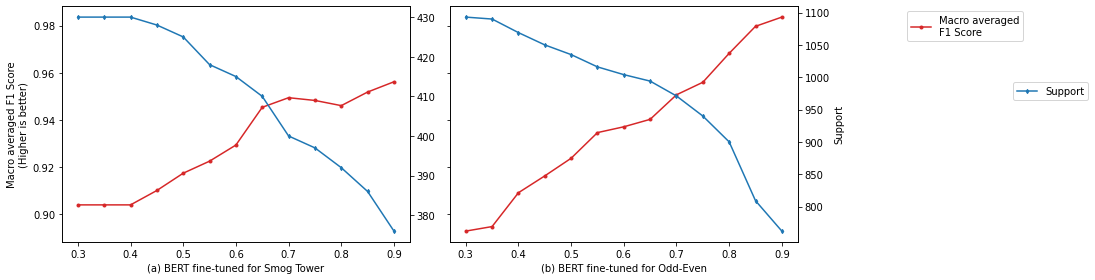

In [23]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(16,4))
ms = 3
ax[0].plot(thST, f1ST, 'o-',c='tab:red', markersize=ms, label='Macro averaged\nF1 Score')
ax0 = ax[0].twinx()
ax0.plot(thST, supST, 'd-',c='tab:blue', markersize=ms, label='Support')
ax[1].plot(thOE, f1OE, 'o-',c='tab:red', markersize=ms, label='Macro averaged\nF1 Score')
ax1 = ax[1].twinx()
ax1.plot(thOE, supOE, 'd-',c='tab:blue', markersize=ms, label='Support')
ax[0].set_ylabel('Macro averaged F1 Score\n(Higher is better)')
# ax0.set_ylabel('Support')
ax[0].set_xlabel('(a) BERT fine-tuned for Smog Tower')
ax[1].set_xlabel('(b) BERT fine-tuned for Odd-Even')
ax1.set_ylabel('Support')
ax[1].legend(bbox_to_anchor=(1.3,1))
ax1.legend(bbox_to_anchor=(1.85,0.7))
#ax[0].legend(loc='lower center')
#ax0.legend(loc='upper right')
#ax[0].set_ylim(0.86,1)
#ax[1].set_ylim(0.86,1)
ax1.set_yticks([800,850,900,950,1000,1050,1100])
#ax1.set_yticks(np.linspace(800,1100,5).astype(int))
plt.tight_layout()
plt.savefig('Sensitivity.pdf')

In [24]:
list(zip(thOE, f1OE, supOE))

[(0.3, 0.8928841945167972, 1093),
 (0.35, 0.8948051639784175, 1090),
 (0.39999999999999997, 0.9091516154275543, 1069),
 (0.44999999999999996, 0.9162884584783613, 1050),
 (0.49999999999999994, 0.9237629686304304, 1035),
 (0.5499999999999999, 0.9346452216701945, 1016),
 (0.5999999999999999, 0.9371049077988953, 1004),
 (0.6499999999999999, 0.9402623495854607, 994),
 (0.7, 0.9506677929955633, 971),
 (0.7499999999999999, 0.9559770351090352, 940),
 (0.7999999999999998, 0.9682489283317582, 900),
 (0.8499999999999999, 0.9797029904857221, 809),
 (0.8999999999999999, 0.9836124377279547, 762)]

In [25]:
list(zip(thST, f1ST, supST))

[(0.3, 0.9039987691868117, 430),
 (0.35, 0.9039987691868117, 430),
 (0.39999999999999997, 0.9039987691868117, 430),
 (0.44999999999999996, 0.9101064286968837, 428),
 (0.49999999999999994, 0.9174329501915709, 425),
 (0.5499999999999999, 0.9225345242554829, 418),
 (0.5999999999999999, 0.9293725314852076, 415),
 (0.6499999999999999, 0.9453759120117778, 410),
 (0.7, 0.9494406240987998, 400),
 (0.7499999999999999, 0.9482775598942981, 397),
 (0.7999999999999998, 0.9460778818095333, 392),
 (0.8499999999999999, 0.951840477021876, 386),
 (0.8999999999999999, 0.956191651976912, 376)]